In [ ]:
- feature: pclass, sex, fare
- label: survived

    1, fmale, 32
1. 1등급, female, 32달러 인경우 생사유무를 예측하시요
( voting , bagging, boost, deep learning 을 이용하시요) 
2. 위의 모델의 train, test, f1 score 를 구하시요
3. confusion matrix 를 구하고 heatmap 을 그리시요.
4. roc curve 를 그리시요.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier,RandomForestClassifier, AdaBoostClassifier 
from sklearn.linear_model import Ridge,Lasso,ElasticNet, LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve

In [2]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
x_data = titanic[['pclass', 'sex', 'fare']]
y_data = titanic['survived']

In [4]:
# train, test 분류
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,
                                                    stratify=y_data, random_state=1 )

1. 1등급, female, 32달러 인경우 생사유무를 예측하시요
(voting , bagging, boost, deep learning 을 이용하시요) 

# Soft Voting

In [5]:
ct=make_column_transformer((OneHotEncoder(),['sex']),remainder='passthrough')
ss=StandardScaler(['pclass','fare'])

model_logi=make_pipeline(ct,ss,LogisticRegression())
model_knn=make_pipeline(ct,ss,KNeighborsClassifier())
moodel_tree=make_pipeline(ct,ss,DecisionTreeClassifier())

In [7]:
model_vote=VotingClassifier(estimators=[('logi',model_logi),('knn', model_knn),('tree',moodel_tree)], voting='soft')
model_vote.fit(x_train, y_train)

VotingClassifier(estimators=[('logi',
                              Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('onehotencoder',
                                                                                OneHotEncoder(),
                                                                                ['sex'])])),
                                              ('standardscaler',
                                               StandardScaler(copy=['pclass',
                                                                    'fare'])),
                                              ('logisticregression',
                                               LogisticRegression())])),
                             ('knn',
                              Pipeline(steps=[('columntransformer',
                                               C

1) 1등급, female, 32달러 인 경우 

In [8]:
xt=pd.DataFrame([[1,'female', 32]], columns=['pclass','sex','fare'])
print('예측:', model_vote.predict(xt))

예측: [1]


2) f1 score

In [44]:
print('f1_score ', f1_score(y_test, model_vote.predict(x_test)))

f1_score  0.7727272727272727


3) confusion matrix

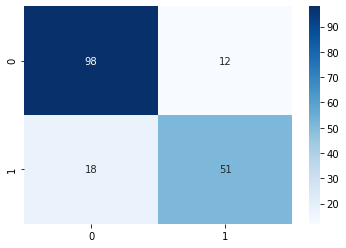

In [45]:
y_test_pred = model_vote.predict(x_test)
cm_train = confusion_matrix(y_test, y_test_pred)

sns.heatmap( cm_train, annot=True, cmap='Blues')
plt.show()

4) ROC Curve

In [46]:
yp = model_vote.predict_proba(x_test)

In [23]:
ydf=y_test.copy()
ydf = pd.DataFrame(data=y_test.copy())
ydf['proba'] = yp[:, -1] # 칼럼 추가
ydf.sort_values(by='proba')

,survived,proba
271,1,0.031599
371,0,0.031779
411,0,0.031789
804,1,0.031792
131,0,0.031794
...,...,...
700,1,0.974953
716,1,0.974953
380,1,0.974953
311,1,0.975722


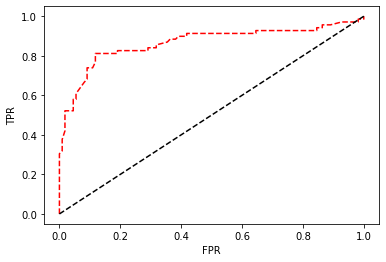

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, ydf['proba'].values) # 실제값(y_true), 확률값(y_score)

plt.plot(fpr, tpr, 'r--')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# bagging

In [65]:
model_knn=KNeighborsClassifier()

model_bag=make_pipeline(ct,ss ,BaggingClassifier(model_knn, n_estimators=10, max_samples=0.5)) #knn 모델 10번 만들어지는거임
model_bag.fit(x_train, y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(), ['sex'])])),
                ('standardscaler', StandardScaler(copy=['pclass', 'fare'])),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=KNeighborsClassifier(),
                                   max_samples=0.5))])

1) 1등급, female, 32달러 인 경우 

In [66]:
print('예측:', model_bag.predict(xt))

예측: [1]


2) f1 score

In [67]:
print('f1_score ', f1_score(y_test, model_bag.predict(x_test)))

f1_score  0.7462686567164178


3) confusion matrix

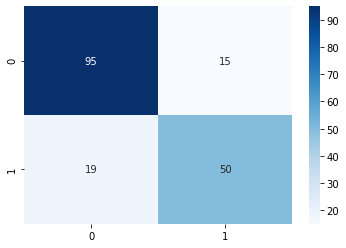

In [68]:
y_test_pred = model_bag.predict(x_test)
cm_train = confusion_matrix(y_test, y_test_pred)

sns.heatmap( cm_train, annot=True, cmap='Blues')
plt.show()

4) ROC Curve

In [69]:
yp = model_bag.predict_proba(x_test)

ydf=y_test.copy()
ydf = pd.DataFrame(data=y_test.copy())
ydf['proba'] = yp[:, -1] # 칼럼 추가
ydf.sort_values(by='proba')

,survived,proba
640,0,0.0
833,0,0.0
371,0,0.0
271,1,0.0
704,0,0.0
...,...,...
513,1,1.0
820,1,1.0
257,1,1.0
52,1,1.0


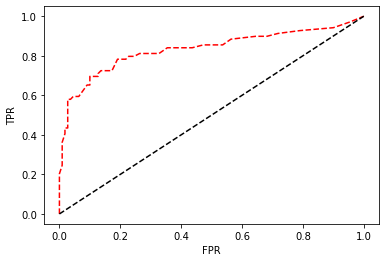

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, ydf['proba'].values) # 실제값(y_true), 확률값(y_score)

plt.plot(fpr, tpr, 'r--')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Boost

In [71]:
model_ada = make_pipeline(ct,ss ,AdaBoostClassifier()) # tree +  boost
model_ada.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(), ['sex'])])),
                ('standardscaler', StandardScaler(copy=['pclass', 'fare'])),
                ('adaboostclassifier', AdaBoostClassifier())])

1) 1등급, female, 32달러 인 경우 

In [72]:
print('예측:', model_ada.predict(xt))

예측: [1]


2) f1 score

In [73]:
print('f1_score ', f1_score(y_test, model_ada.predict(x_test)))

f1_score  0.7669172932330827


3) confusion matrix

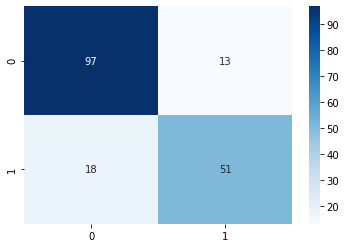

In [74]:
y_test_pred = model_ada.predict(x_test)
cm_train = confusion_matrix(y_test, y_test_pred)

sns.heatmap( cm_train, annot=True, cmap='Blues')
plt.show()

4) ROC Curve

In [75]:
yp = model_ada.predict_proba(x_test)

ydf=y_test.copy()
ydf = pd.DataFrame(data=y_test.copy())
ydf['proba'] = yp[:, -1] # 칼럼 추가
ydf.sort_values(by='proba')

,survived,proba
804,1,0.391063
465,0,0.391063
590,0,0.391063
371,0,0.391063
433,0,0.391063
...,...,...
849,1,0.515284
581,1,0.515284
820,1,0.515284
513,1,0.520534


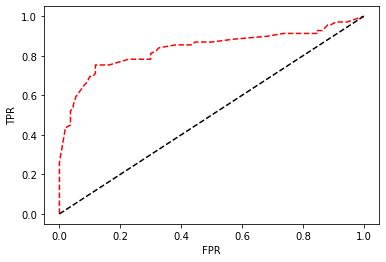

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, ydf['proba'].values) # 실제값(y_true), 확률값(y_score)

plt.plot(fpr, tpr, 'r--')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Deep Learning

In [77]:
model_mpl = make_pipeline(ct,ss ,MLPClassifier(hidden_layer_sizes=(64, 32), verbose=1, max_iter=100))
model_mpl.fit(x_train, y_train)

Iteration 1, loss = 0.69067912
Iteration 2, loss = 0.65339398
Iteration 3, loss = 0.62254990
Iteration 4, loss = 0.59653222
Iteration 5, loss = 0.57533268
Iteration 6, loss = 0.55569172
Iteration 7, loss = 0.53831028
Iteration 8, loss = 0.52258006
Iteration 9, loss = 0.50908454
Iteration 10, loss = 0.49700137
Iteration 11, loss = 0.48591990
Iteration 12, loss = 0.47685257
Iteration 13, loss = 0.47000977
Iteration 14, loss = 0.46417358
Iteration 15, loss = 0.46017096
Iteration 16, loss = 0.45638008
Iteration 17, loss = 0.45446631
Iteration 18, loss = 0.45261309
Iteration 19, loss = 0.45132846
Iteration 20, loss = 0.45073988
Iteration 21, loss = 0.44992808
Iteration 22, loss = 0.44932252
Iteration 23, loss = 0.44912974
Iteration 24, loss = 0.44848077
Iteration 25, loss = 0.44802336
Iteration 26, loss = 0.44738718
Iteration 27, loss = 0.44705784
Iteration 28, loss = 0.44641431
Iteration 29, loss = 0.44612676
Iteration 30, loss = 0.44569818
Iteration 31, loss = 0.44525963
Iteration 32, los

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(), ['sex'])])),
                ('standardscaler', StandardScaler(copy=['pclass', 'fare'])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100,
                               verbose=1))])

1) 1등급, female, 32달러 인 경우 

In [78]:
print('예측:', model_mpl.predict(xt))

예측: [1]


2) f1 score

In [79]:
print('f1_score ', f1_score(y_test, model_mpl.predict(x_test)))

f1_score  0.761904761904762


3) confusion matrix

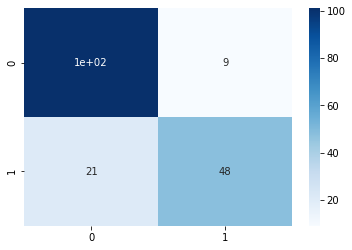

In [80]:
y_test_pred = model_mpl.predict(x_test)
cm_train = confusion_matrix(y_test, y_test_pred)

sns.heatmap( cm_train, annot=True, cmap='Blues')
plt.show()

4) ROC Curve

In [81]:
yp = model_mpl.predict_proba(x_test)

ydf=y_test.copy()
ydf = pd.DataFrame(data=y_test.copy())
ydf['proba'] = yp[:, -1] # 칼럼 추가
ydf.sort_values(by='proba')

,survived,proba
413,0,0.100193
277,0,0.100193
466,0,0.100193
271,1,0.111988
371,0,0.123636
...,...,...
496,1,0.978804
52,1,0.979060
513,1,0.980997
842,1,0.981103


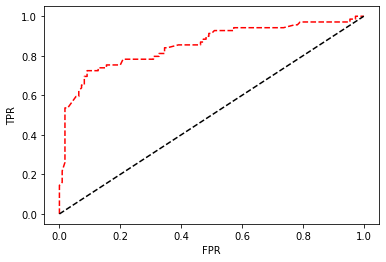

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, ydf['proba'].values) # 실제값(y_true), 확률값(y_score)

plt.plot(fpr, tpr, 'r--')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()